## 14-MAY-2020

In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([10,20,30,40,50])

In [19]:
type(s)

pandas.core.series.Series

In [3]:
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [4]:
s[0]

10

In [36]:
sales = pd.Series([10,20,40,30,50], index= ['mon','tue','wed','thu','fri'])

In [37]:
sales

mon    10
tue    20
wed    40
thu    30
fri    50
dtype: int64

In [9]:
marks = pd.Series([60,80,56,89,66], index =[101,102,103,104,105])

In [10]:
marks

101    60
102    80
103    56
104    89
105    66
dtype: int64

In [12]:
marks[101]

60

In [21]:
nums = pd.Series( np.random.randint(1,100,10), index = np.arange(11,21))

In [22]:
nums

11    29
12    72
13    37
14    18
15    16
16    86
17    49
18    79
19    54
20    94
dtype: int32

### Properties of Series

In [23]:
nums.is_unique

True

In [24]:
nums.axes

[Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')]

In [26]:
nums.index

Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')

In [30]:
print(nums.values, type(nums.values))

[29 72 37 18 16 86 49 79 54 94] <class 'numpy.ndarray'>


### loc and iloc

In [32]:
nums[11], nums.loc[11], nums.iloc[0]

(29, 29, 29)

In [35]:
# for loc end range is inclusive and for iloc it is exclusive 
nums.loc[11:15], nums.iloc[0:5]

(11    29
 12    72
 13    37
 14    18
 15    16
 dtype: int32,
 11    29
 12    72
 13    37
 14    18
 15    16
 dtype: int32)

### Methods of Series 

In [38]:
nums.describe()

count    10.000000
mean     53.400000
std      28.379179
min      16.000000
25%      31.000000
50%      51.500000
75%      77.250000
max      94.000000
dtype: float64

In [40]:
summary = nums.describe()
print(type(summary))

<class 'pandas.core.series.Series'>


In [42]:
summary['mean'], summary['50%']

(53.4, 51.5)

In [44]:
nums.mean(), nums.mode()[0]

(53.4, 16)

In [45]:
nums.index.is_unique

True

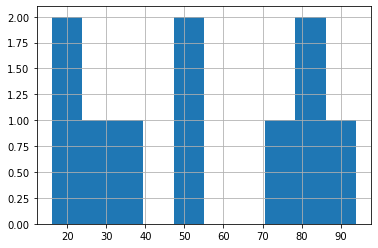

In [47]:
nums.hist()

In [48]:
marks = pd.Series([60,70,80,60,85,75])

In [49]:
marks.rank()

0    1.5
1    3.0
2    5.0
3    1.5
4    6.0
5    4.0
dtype: float64

In [50]:
marks.rank(ascending=False)

0    5.5
1    4.0
2    2.0
3    5.5
4    1.0
5    3.0
dtype: float64

In [53]:
marks.rank(method='max')

0    2.0
1    3.0
2    5.0
3    2.0
4    6.0
5    4.0
dtype: float64

In [52]:
marks.rank(method='dense')

0    1.0
1    2.0
2    4.0
3    1.0
4    5.0
5    3.0
dtype: float64

In [54]:
marks.head(3)

0    60
1    70
2    80
dtype: int64

In [55]:
marks.tail(3)

3    60
4    85
5    75
dtype: int64

In [58]:
pd.Series([10,20,30,15,30]).pct_change() * 100

0      NaN
1    100.0
2     50.0
3    -50.0
4    100.0
dtype: float64

In [60]:
marks.sort_values(ascending=False)

4    85
2    80
5    75
1    70
3    60
0    60
dtype: int64

In [61]:
marks.quantile(.25)

62.5

In [62]:
marks.quantile([.25,.75])

0.25    62.50
0.75    78.75
dtype: float64

In [64]:
marks.agg(['min','max','sum','mean',len])

min      60.000000
max      85.000000
sum     430.000000
mean     71.666667
len       6.000000
dtype: float64

In [66]:
def get_grade(v):
    if v > 80:
        return "A"
    elif v > 60:
        return "B"
    else:
        return "C"

In [67]:
marks.apply(get_grade)

0    C
1    B
2    B
3    C
4    A
5    B
dtype: object

In [68]:
marks.apply(lambda v : 'Pass' if v > 60 else 'Fail')

0    Fail
1    Pass
2    Pass
3    Fail
4    Pass
5    Pass
dtype: object

## 15-MAY-2020

In [9]:
marks > 50

101    False
102    False
103     True
104    False
105     True
106     True
107    False
108    False
109    False
110    False
dtype: bool

In [10]:
marks.apply( lambda v : 'Pass' if v >= 50 else 'Fail')

101    Fail
102    Fail
103    Pass
104    Fail
105    Pass
106    Pass
107    Fail
108    Fail
109    Fail
110    Pass
dtype: object

In [12]:
marks.head(3)

101    35
102     3
103    68
dtype: int32

In [16]:
smarks = marks.sort_values(ascending=False)

In [20]:
smarks.iloc[:3]

106    87
103    68
105    52
dtype: int32

In [22]:
smarks.tail(3)

104    33
108    11
102     3
dtype: int32

In [28]:
sales = pd.Series((100,120,150,100,200), index  = np.arange(1,6))
sales.name  ="Units"
sales.index.name = "Month"

In [29]:
sales.pct_change() * 100

Month
1           NaN
2     20.000000
3     25.000000
4    -33.333333
5    100.000000
Name: Units, dtype: float64

In [30]:
sales.to_csv("sales.csv")

In [31]:
sales.to_json()

'{"1":100,"2":120,"3":150,"4":100,"5":200}'

In [34]:
sales.value_counts()

100    2
150    1
200    1
120    1
Name: Units, dtype: int64

### Handle null values

In [36]:
sales = pd.Series((100,120,150,100,200,np.nan,175,np.nan,200,100), 
                   index  = np.arange(1,11))
sales.name  ="Units"
sales.index.name = "Month"

In [39]:
sales.isna()

Month
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10    False
Name: Units, dtype: bool

In [41]:
sales.isna().value_counts()

False    8
True     2
Name: Units, dtype: int64

In [42]:
sales.isna().sum()

2

In [43]:
sales.fillna(0)

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       0.0
7     175.0
8       0.0
9     200.0
10    100.0
Name: Units, dtype: float64

In [45]:
sales.dropna()

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
Name: Units, dtype: float64